In this script the data set was analyzed.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
from matplotlib.colors import ListedColormap
import numpy as np
import scanpy as sc
import scanpy.external as se
from anndata import *
sc.logging.print_versions()

-----
anndata     0.9.2
scanpy      1.9.5
-----
PIL                 9.4.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
executing           0.8.3
h5py                3.9.0
hypergeom_ufunc     NA
igraph              0.10.8
invgauss_ufunc      NA
ipykernel           6.25.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.40.1
louvain             0.8.1
matplotlib          3.7.2
matplotlib_inline   0.1.6
mkl                 2.4.0
mpl_toolkits        NA
natsort             8.4.0
nbinom_ufunc        NA
ncf_ufunc           NA
nct_ufunc           NA
ncx2_ufunc          NA
numba               0.57.1
numexpr             2.8.4
numpy               1.24.3
packaging           23.1
pandas           

In [23]:
data_path = 'YOURFOLDER/droplet_liver.h5ad'
droplet = read_h5ad(data_path)
droplet = droplet[droplet.obs['age'] != '1m']

In [24]:
# colors
color_dict = {
    'hepatocyte': '#99CCCC',
    'endothelial cell of hepatic sinusoid': '#BDDC7A',
    'Kupffer cell': '#91B0CF',
    'hepatic stellate cell': '#80B1D3',
    'natural killer cell': '#E49C9C',
    'plasmacytoid dendritic cell': '#D9D9D9',
    'B cell': '#EBB770',
    'myeloid leukocyte': '#7CB296',
    'duct epithelial cell': '#6E78A2'
}
distinct_cmap = ListedColormap([color_dict[key] for key in color_dict])

UMAP of all cells

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\scanpy\plotting\_utils.py:429: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


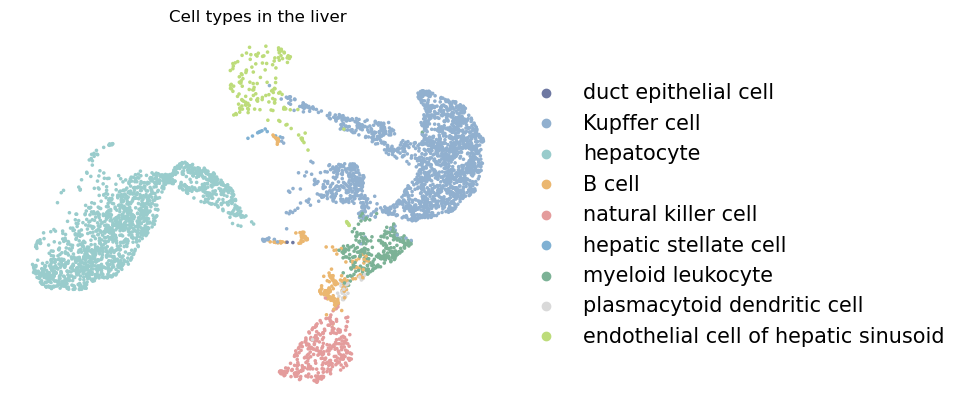

In [27]:
sc.pl.umap(droplet, color='cell_type', frameon=False, title ='Cell types in the liver', palette=  color_dict,  legend_fontsize = '15')

Cell type percentage per donor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

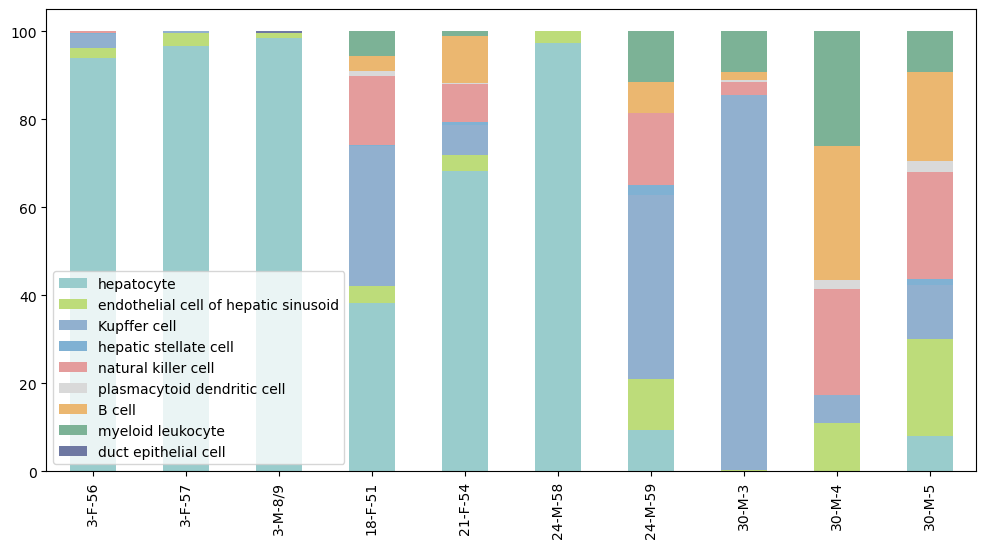

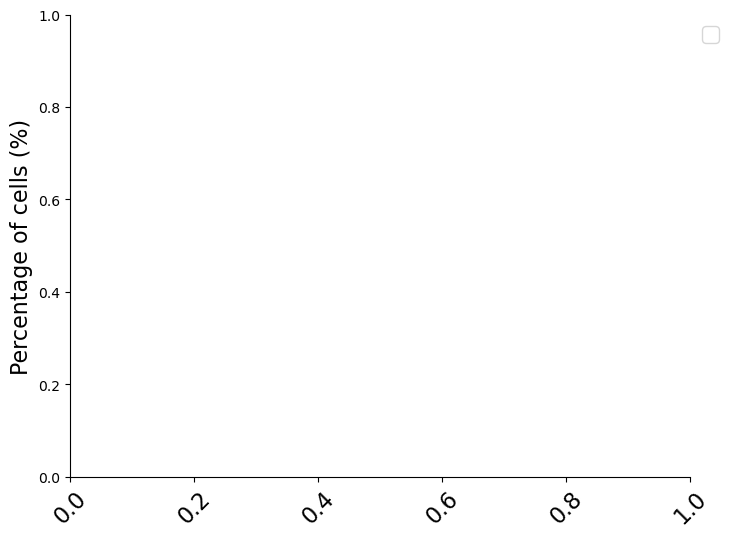

In [25]:
mouse_categories = droplet.obs['donor_id'].unique().tolist()
mouse_categories = [ '3-F-56', '3-F-57', '3-M-8/9','18-F-51', '21-F-54', '24-M-58', '24-M-59', '30-M-3', '30-M-4', '30-M-5' ]
cell_categories = droplet.obs['cell_type'].unique().tolist()
cell_categories = droplet.obs['cell_type'].unique().tolist()
#cell_categories = ['B cell', 'Kupffer cell', 'NK cell','endothelial cell of hepatic sinusoid', 'hepatic stellate cell', 'hepatocyte', 'myeloid leukocyte','plasmacytoid dendritic cell','duct epithelial cell' ]
frame = pd.DataFrame(columns=cell_categories, index=mouse_categories)

for mouse in mouse_categories:
    for cell in cell_categories:
        count_celltype = (droplet.obs['cell_type'].isin([cell]) & droplet.obs['donor_id'].isin([mouse])).sum()
        count_all = (droplet.obs['donor_id'].isin([mouse])).sum()
        percentage = count_celltype/count_all*100
        frame.loc[mouse, cell] = percentage

frame['label'] = frame.index
frame['label'] = frame['label'].str.split('-').str[0]+  ' months'
#frame.index = frame['label']
frame.plot(kind='bar', stacked=True, figsize=(12, 6), colormap=distinct_cmap)

plt.figure(figsize=(8, 6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)
plt.ylabel('Percentage of cells (%)', fontsize=16)
plt.xlabel(' ')
plt.xticks(rotation=45, fontsize=16)

